# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Create Datset

In [2]:
# Step 1: Create a dataset for mobile conditions with three classes
np.random.seed(42)
n_samples = 300

# Generate 'Years Used' uniformly between 0 to 10 years
years_used = np.random.uniform(0, 10, n_samples)

# Generate 'Battery Life' (in hours) such that older phones generally have lower battery life
battery_life = np.random.uniform(4, 10, n_samples) - 0.4 * years_used + np.random.normal(0, 0.5, n_samples)

# Label phones based on battery life and years used
# 0: Worst Condition (years > 5 and battery life < 4 hours)
# 1: Usable Condition (3 < years <= 5 and 4 <= battery life <= 6 hours)
# 2: Best Condition (years <= 3 and battery life > 6 hours)
labels = np.select(
    [(years_used > 5) & (battery_life < 4), 
     (years_used > 3) & (years_used <= 5) & (battery_life >= 4) & (battery_life <= 6), 
     (years_used <= 3) & (battery_life > 6)], 
    [0, 1, 2], 
    default=1)  # Default to Usable Condition


# Set X and y

In [3]:
X = np.column_stack((battery_life, years_used))
y = labels

# Fit

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

# Visualize

In [5]:
new_mobile = np.array([[3, 4]])  # battery hours, yesars used

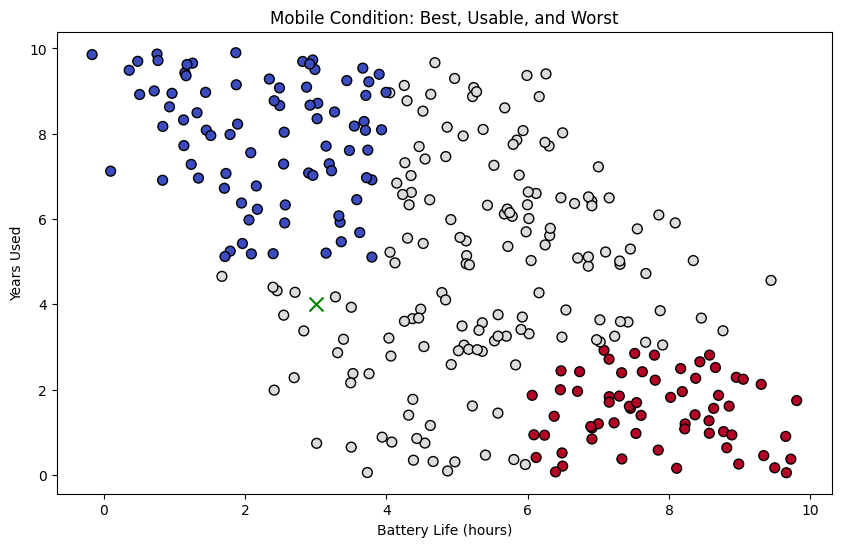

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')
plt.xlabel('Battery Life (hours)')
plt.ylabel('Years Used')
plt.title('Mobile Condition: Best, Usable, and Worst')

plt.scatter(new_mobile[0, 0], new_mobile[0, 1], c='green', s=100, marker='x', edgecolors='k')
plt.show()

# Voting

The predicted condition for the new mobile is: Usable Condition


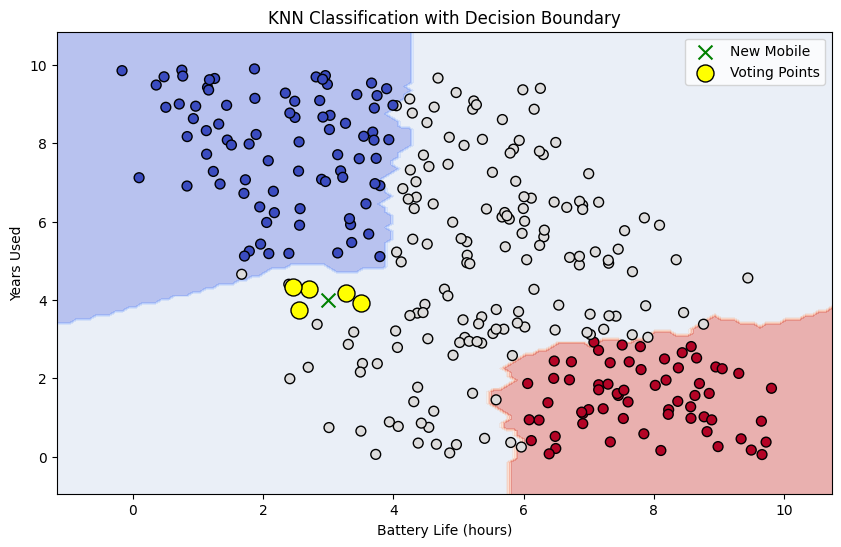

In [7]:
predicted_condition = knn.predict(new_mobile)

condition_text = {0: "Worst Condition", 1: "Usable Condition", 2: "Best Condition"}[predicted_condition[0]]
print(f"The predicted condition for the new mobile is: {condition_text}")

# Identify the k-nearest neighbors
neighbors_idx = knn.kneighbors(new_mobile, return_distance=False)
neighbor_points = X[neighbors_idx][0]

# Step 4: Visualize the decision boundary and highlight voting points
h = 0.1
h2 = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h2))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')
plt.scatter(new_mobile[0, 0], new_mobile[0, 1], c='green', s=100, marker='x', edgecolors='k', label='New Mobile')

# Highlight voting points
plt.scatter(neighbor_points[:, 0], neighbor_points[:, 1], c='yellow', s=150, marker='o', edgecolors='black', label='Voting Points')

plt.xlabel('Battery Life (hours)')
plt.ylabel('Years Used')
plt.title('KNN Classification with Decision Boundary')
plt.legend()
plt.show()

# Assignment

# Try with different points 